# ***This was the first machine learning project I built, completed on December 6, 2023. Through this project, I learned the fundamentals of machine learning and began gaining hands-on experience in the field. Although the initial version had several shortcomings, I later refined it significantly in the final version, incorporating insights from the latest research.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
class_counts = df['diagnosis'].value_counts()

print(class_counts)

B    357
M    212
Name: diagnosis, dtype: int64


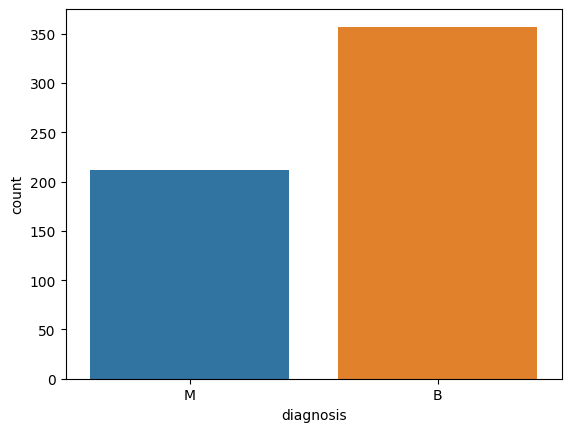

In [ ]:
sns.countplot(x="diagnosis", data=df, label="Class ")
plt.show()

In [ ]:
df["diagnosis"] = (df["diagnosis"] == "M").astype(int)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
if 'id' in df.columns:
  df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


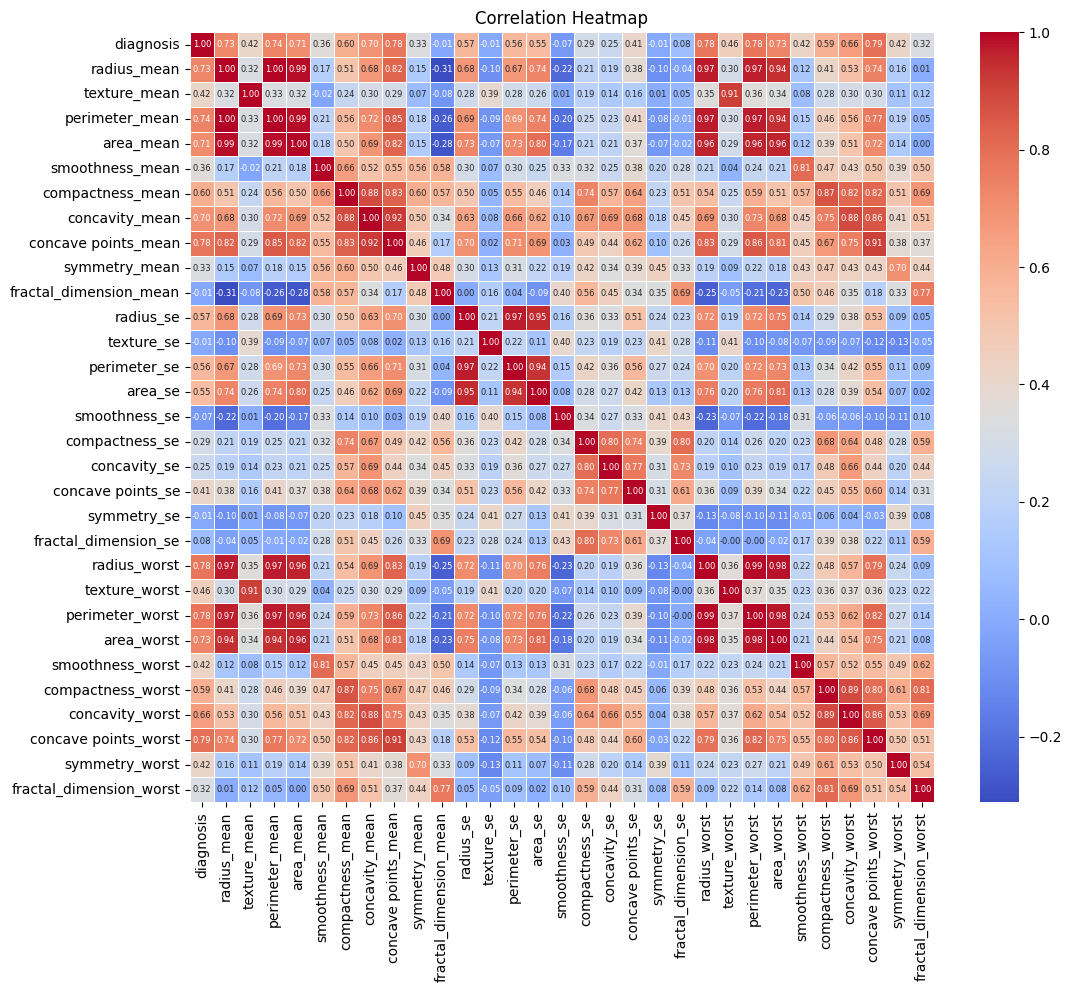

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data_points = df.shape[0]
print(data_points)

569


In [ ]:
features = df.shape[1]
print(features)

31


In [ ]:
total_null_values = df.isnull().sum().sum()
print("Total Number of Null Values:", total_null_values)

Total Number of Null Values: 0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

# Split the Data into Train and Test Sets (random splitting) --> test size = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Oversample the Training Data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Standardize the Features on the Training Data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_resampled)

# Standardize the Features on the Test Data
X_test_standardized = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_standardized, y_train_resampled)

knn_pred = knn_classifier.predict(X_test_standardized)

knn_accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
class_report = classification_report(y_test, knn_pred)

print(f'Accuracy: {knn_accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



Accuracy: 0.9532

Confusion Matrix:
[[104   4]
 [  4  59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_standardized, y_train_resampled)

nb_pred = naive_bayes_classifier.predict(X_test_standardized)

nb_accuracy = accuracy_score(y_test, nb_pred)
conf_matrix = confusion_matrix(y_test, nb_pred)
class_report = classification_report(y_test, nb_pred)

print(f'Accuracy: {nb_accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



Accuracy: 0.9357

Confusion Matrix:
[[103   5]
 [  6  57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier.fit(X_train_standardized, y_train_resampled)

logreg_pred = logreg_classifier.predict(X_test_standardized)

logreg_accuracy = accuracy_score(y_test, logreg_pred)
conf_matrix = confusion_matrix(y_test, logreg_pred)
class_report = classification_report(y_test, logreg_pred)

# Print the results
print(f'Accuracy: {logreg_accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



Accuracy: 0.9825

Confusion Matrix:
[[106   2]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
models = ['KNN', 'Naive Bayes', 'Logistic Regression']


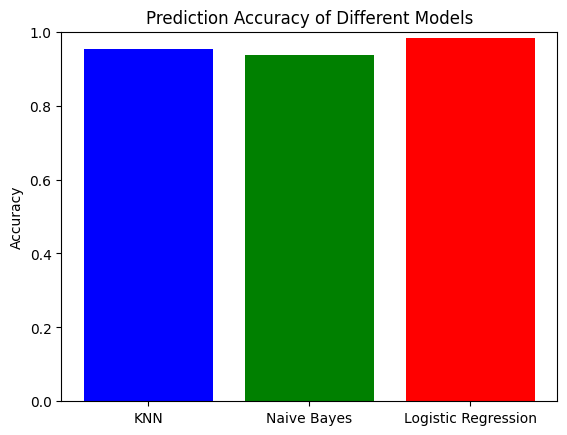

In [ ]:
accuracies = [knn_accuracy, nb_accuracy, logreg_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)  # Setting y-axis limit to ensure a proper scale (0 to 1)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

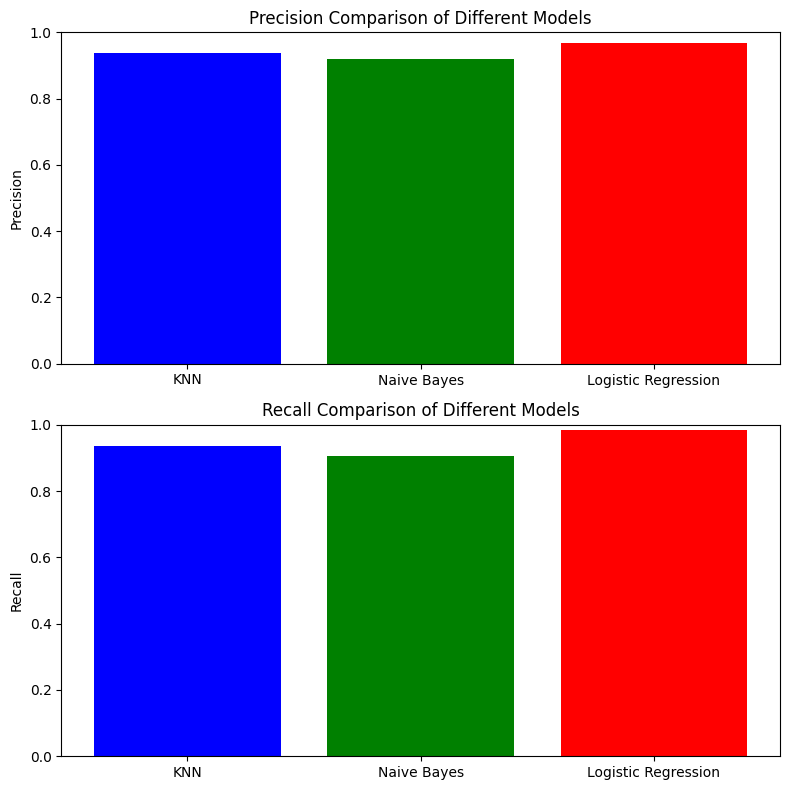

In [ ]:
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)

logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)

precisions = [knn_precision, nb_precision, logreg_precision]
recalls = [knn_recall, nb_recall, logreg_recall]

# Plotting precision and recall
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.bar(models, precisions, color=['blue', 'green', 'red'])
ax1.set_ylim(0, 1)
ax1.set_ylabel('Precision')
ax1.set_title('Precision Comparison of Different Models')

ax2.bar(models, recalls, color=['blue', 'green', 'red'])
ax2.set_ylim(0, 1)
ax2.set_ylabel('Recall')
ax2.set_title('Recall Comparison of Different Models')

plt.tight_layout()
plt.show()

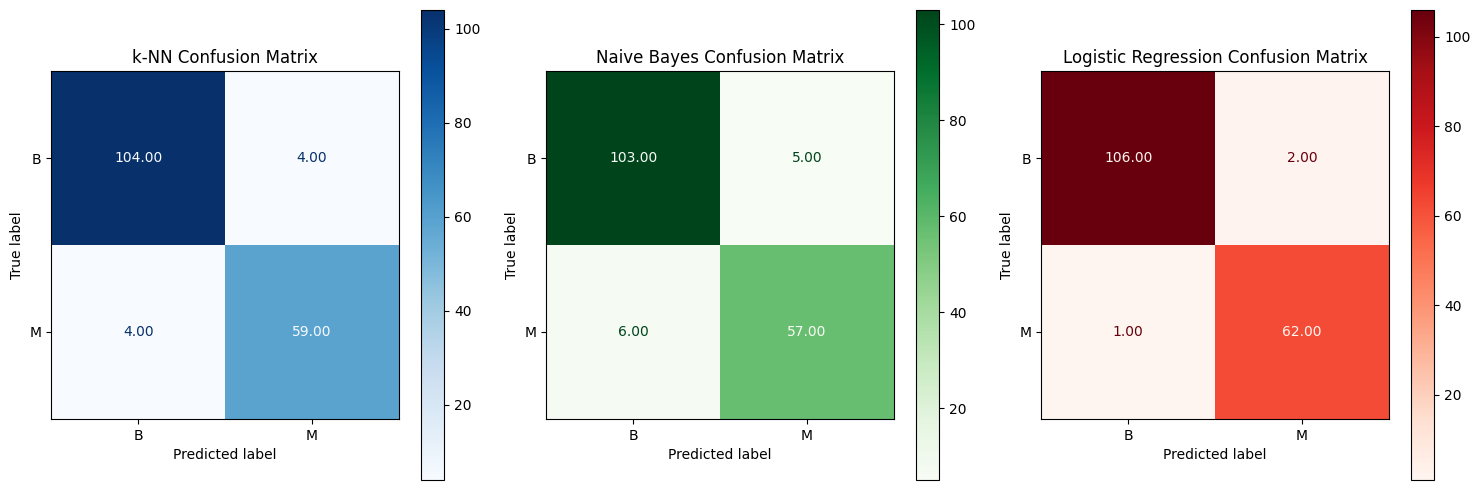

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained k-NN, Naive Bayes, and Logistic Regression models
# knn_classifier, naive_bayes_classifier, logreg_classifier

# Create subplots for each model's confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_classifier.predict(X_test_standardized)),
                                  display_labels=['B', 'M'])
disp_knn.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='.2f')
axes[0].set_title('k-NN Confusion Matrix')

# Plot the confusion matrix for Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, naive_bayes_classifier.predict(X_test_standardized)),
                                 display_labels=['B', 'M'])
disp_nb.plot(ax=axes[1], cmap=plt.cm.Greens, values_format='.2f')
axes[1].set_title('Naive Bayes Confusion Matrix')

# Plot the confusion matrix for Logistic Regression
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, logreg_classifier.predict(X_test_standardized)),
                                     display_labels=['B', 'M'])
disp_logreg.plot(ax=axes[2], cmap=plt.cm.Reds, values_format='.2f')
axes[2].set_title('Logistic Regression Confusion Matrix')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

